# Proyek Analisis Data - Bike Sharing Dataset

* Nama : Mellania Permata Sylvie
* Email : mellasylvie1027@gmail.com
* ID Dicoding : mellaniapermata



## Pertanyaan Bisnis


Berikut merupakan pertanyaan bisnis dari proyek ini :
*   Bagaimana grafik performa rental sepeda dalam beberapa bulan terakhir ?

* Bagaimana perbedaan jumlah sewa antara penyewa biasa dengan penyewa yang telah terdaftar ?

* Bagaimana perbedaan jumlah sewa berdasarkan hari, bulan, musim ?

* Bagaimana perbandingan jumlah sewa berdasarkan hari kerja dan hari libur ?

* Berapakah rata-rata perhitungan temperatur (temp & atemp), kelembaban (humidity) dan kecepatan angin (windspeed) ?



## Mengimpor Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_dataset = '/content/drive/MyDrive/Dataset/Bike-sharing-dataset'

In [4]:
os.listdir(folder_dataset)

['day.csv', 'hour.csv', 'Readme.txt']

#### Load Tabel Bike Day 

In [5]:
data_bike_day = '/content/drive/MyDrive/Dataset/Bike-sharing-dataset/day.csv'
data_bike_hour = '/content/drive/MyDrive/Dataset/Bike-sharing-dataset/hour.csv'

In [6]:
bike_day = pd.read_csv(data_bike_day)
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Uraian Variabel:

* **instant** = indeks data
* **dteday** = tanggal
* **season** = musim (1:semi, 2:panas, 3:gugur, 4:dingin)
* **yr** = tahun(0:2011, 1:2012)
* **mnth** = bulan (1 sd 12)
* **hr** = jam (0 sd 23)
* **holiday** = musim liburan atau tidak
* **weekday** = hari dalam seminggu
* **workingday** = jika hari libur 0, hari kerja 1
* **weathersit** = 
  - 1 : cerah, sedikit awan, berawan sebagian
  - 2 : kabut + mendung, kabut + awan pecah, kabut + sedikit awan, kabut
  - 3 : salju ringan, hujan ringan + badai petir+ awan tersebar, hujan ringan + awan tersebar
  - 4 : hujan lebat + palet es + badai petir + kabut, salju + kabut

* **temp** = suhu normal dalam celcius . Nilai dibagi 41 (maks)
* **atemp** = suhu perasaan normal dalam celcius. Nilai dibagi 50(maks)
* **hum** = kelembaban normal. Nilai dibagi menjadi 100 (maks)
* **windspeed** = kecepatan angin yang dinormalisasi. nilai dibagi 67(maks)
* **casual** = jumlah pengguna biasa
* **registered** = jumlah pengguna terdaftar
* **cnt** = hitungan total sepeda sewaan termasuk casual dan registered 

Karena nama variabel yang digunakan kurang jelas maka saya memutuskan untuk mengganti beberapa nama variabel.

In [7]:
bike_day.rename(columns={'instant':'no_index',
                         'dteday':'date',
                         'yr':'year',
                         'mnth':'month',
                         'weathersit':'weather',
                         'hum':'humidity',
                         'cnt':'total'}, inplace=True)

In [8]:
bike_day.head()

,no_index,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Tabel Bike Hour

In [9]:
bike_hour = pd.read_csv(data_bike_hour)
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
bike_hour.rename(columns={'instant':'no_index',
                          'dteday':'date',
                          'yr':'year',
                          'mnth':'month',
                          'hr':'hour',
                          'weathersit':'weather',
                          'hum':'humidity',
                          'cnt':'total'}, inplace=True)

In [11]:
bike_hour.head()

,no_index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data Bike Day

Melihat informasi mengenai data bike day

In [12]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_index    731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  total       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada informasi di atas, dapat dilihat bahwa semua tipe data sudah tepat, kecuali pada kolom date yang bertipe object. Karena kurang sesuai, maka nanti kolom date akan diubah tipe datanya menjadi datetime.

**Memeriksa Missing Value**



In [13]:
bike_day.isna().sum()

no_index      0
date          0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

Tidak terdapat missing value pada data

**Memeriksa duplikasi data**

In [14]:
duplikasi = bike_day.duplicated().sum()
print("Jumlah data duplikasi pada file bike day :", duplikasi)

Jumlah data duplikasi pada file bike day : 0


**Memeriksa parameter statistik**

In [15]:
bike_day.describe()

,no_index,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika dilihat, tidak ada keanehan pada parameter statistik data bike day

#### **Menilai Data Bike Hour**

**Melihat info data Bike Hour**

In [16]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_index    17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  total       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama dengan data pada bike day, kolom date seharusnya diubah tipe datanya menjadi datetime.

**Memeriksa Missing Value pada Data Bike Hour**

In [17]:
bike_hour.isna().sum()

no_index      0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
total         0
dtype: int64

Tisak ditemukan missing value

**Memeriksa duplikasi data pada bike hour**

In [18]:
duplikasi_bike_hour = bike_hour.duplicated().sum()
print("Jumlah duplikasi data pada file bike hour :", duplikasi_bike_hour)

Jumlah duplikasi data pada file bike hour : 0


**Memeriksa parameter statistik**

In [19]:
bike_hour.describe()

,no_index,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terllhat keanehan pada parameter statistik data

### **Cleaning Data**

#### **Membersihkan data Bike Day**


Mengubah tipe data pada kolom **dteday** menjadi datetime

In [20]:
bike_day['date'] = pd.to_datetime(bike_day['date'])

In [21]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   no_index    731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  total       731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### **Membersihkan Data Bike Hour**

Mengubah tipe data pada kolom **dteday** menjadi datetime

In [22]:
bike_hour['date'] = pd.to_datetime(bike_hour['date'])

In [23]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   no_index    17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  total       17379 non-

## **Exploratory Data Analysis (EDA)**

### **Eksplorasi Data Bike Day**

Rangkuman parameter statistik dari data Bike Day

In [24]:
bike_day.describe(include='all')

<ipython-input-24-932f046854f9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_day.describe(include='all')


,no_index,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter statistik di atas, dapat dilihat bahwa jumlah sewa per hari paling banyak mencapai 6946 sepeda dan rata-rata sehari sepeda yang disewa yaitu 3600 an sepeda.

In [25]:
bike_day.groupby(by="season").agg({
    "no_index": "nunique",
    "total": ["max", "min", "mean", "std"]
})

no_index total                                
        nunique   max   min         mean          std
season                                               
1           181  7836   431  2604.132597  1399.942119
2           184  8362   795  4992.331522  1695.977235
3           188  8714  1115  5644.303191  1459.800381
4           178  8555    22  4728.162921  1699.615261

Berdasarkan data diatas, dapat dilihat bahwa pelanggan kebanyakan menyewa sepeda pada musim gugur (no. 3) dan paling sedikit menyewa pada musim semi (no. 1)

In [26]:
bike_day.groupby(by="holiday").agg({
    "no_index": "nunique",
    "total": ["max", "min", "mean", "std"]
})

no_index total                                
         nunique   max   min         mean          std
holiday                                               
0            710  8714    22  4527.104225  1929.013947
1             21  7403  1000  3735.000000  2103.350660

Berdasarkan data di atas, pelanggan lebih banyak menyewa sepeda saat tidak liburan.

In [27]:
bike_day.groupby(by="weekday").agg({
    "no_index": "nunique",
    "total": 'sum'
})

,no_index,total
weekday,,
0,105,444027
1,105,455503
2,104,469109
3,104,473048
4,104,485395
5,104,487790
6,105,477807


Diantara 7 hari, pelanggan lebih banyak menyewa sepeda pada hari ke-6 dengan jumlah 487790

In [28]:
bike_day.groupby(by="workingday").agg({
    "no_index": "nunique",
    "total": ["sum", "max", "min", "mean", "std"]
})

no_index    total                                     
            nunique      sum   max  min         mean          std
workingday                                                       
0               231  1000269  8714  605  4330.168831  2052.141245
1               500  2292410  8362   22  4584.820000  1878.415583

Pelanggan lebih banyak menyewa sepeda saat hari kerja, sewa sepeda terbanyak pada hari kerja mencapai 8362.

In [29]:
bike_day.groupby(by="month").agg({
    "no_index": "nunique",
    "casual": ["min","max"],
    "registered":["min","max"],
    "total" : "sum"
})

no_index casual       registered         total
       nunique    min   max        min   max     sum
month                                               
1           62      9  1070        416  4185  134933
2           57     47  1435        905  4546  151352
3           62     46  3155        491  5893  228920
4           60    120  3252        674  5950  269094
5           62    255  3410       2213  6433  331686
6           60    477  2963       2993  6456  346342
7           62    562  3065       2298  6790  344948
8           62    226  2827        889  6541  351194
9           60    118  3160       1689  6946  345991
10          62      2  3031         20  6911  322352
11          60     69  2290        935  5520  254831
12          62      9  1153        432  6055  211036

Pelanggan lebih banyak menyewa sepeda pada bulan Agustus (bulan ke-8)

---



In [30]:
bike_day.groupby(by="year").agg({
    "temp": ["mean"],
    "atemp":["mean"],
    "humidity":["mean"],
    "windspeed":["mean"]
})

,temp,atemp,humidity,windspeed
,mean,mean,mean,mean
year,,,,
0,0.486665,0.466835,0.643665,0.191403
1,0.504081,0.481852,0.612166,0.189572


Diatas merupakan rata-rata temperatur, atemp, kelembaban, kecepatan angin pada tahun 2011 (0) dan tahun 2012 (1)

In [31]:
bike_day.sort_values(by="total", ascending=False)

,no_index,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


Di atas merupakan urutan jumlah sewa dari yang terbanyak hingga yang paling sedikit. Paling banyak terjadi pada tanggal 15 September 2012 dengan jumlah sewa 8714 sepeda. Paling sedikit terjadi pada tanggal 29 Oktober 2012 dengan jumlah sewa hanya 22 sepeda. 

### **Eksplorasi Data Bike Hour**

In [32]:
bike_hour.describe(include="all")

<ipython-input-32-d171d6bf09e3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_hour.describe(include="all")


,no_index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [33]:
bike_hour.groupby(by="hour").agg({
    "no_index": "nunique",
    "total": ["sum", "max", "min", "mean", "std"]
})

no_index   total                                 
      nunique     sum  max min        mean         std
hour                                                  
0         726   39130  283   2   53.898072   42.307910
1         724   24164  168   1   33.375691   33.538727
2         715   16352  132   1   22.869930   26.578642
3         697    8174   79   1   11.727403   13.239190
4         697    4428   28   1    6.352941    4.143818
5         717   14261   66   1   19.889819   13.200765
6         725   55132  213   1   76.044138   55.084348
7         727  154171  596   1  212.064649  161.441936
8         727  261001  839   5  359.011004  235.189285
9         727  159438  426  14  219.309491   93.703458
10        727  126257  539   8  173.668501  102.205413
11        727  151320  663  10  208.143054  127.495536
12        728  184414  776   3  253.315934  145.081134
13        729  184919  760  11  253.661180  148.107657
14        729  175652  750  12  240.949246  147.271574
15        729  183149  750   7  251.233196  144.632541
16        730  227748  783  11  311.983562  148.682618
17        730  336860  976  15  461.452055  232.656611
18        728  309772  977  23  425.510989  224.639304
19        728  226789  743  11  311.523352  161.050359
20        728  164550  567  11  226.030220  119.670164
21        728  125445  584   6  172.314560   89.788893
22        728   95612  502   9  131.335165   69.937782
23        728   63941  256   2   87.831044   50.846889

Berdasar data di atas, pelanggan paling banyak menyewa sepeda pada jam 17 atau 5 sore. Paling sedikit menyewa di jam 4 pagi.

In [34]:
bike_hour.sort_values(by="total", ascending=False)

,no_index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,0.64,0.6212,0.50,0.2239,91,885,976
14748,14749,2012-09-11,3,1,9,17,0,2,1,1,0.70,0.6364,0.28,0.0000,168,802,970
14725,14726,2012-09-10,3,1,9,18,0,1,1,1,0.62,0.6212,0.35,0.2985,111,857,968
15084,15085,2012-09-25,4,1,9,17,0,2,1,1,0.66,0.6212,0.39,0.2836,107,860,967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,11305,2012-04-21,2,1,4,5,0,6,0,1,0.50,0.4848,0.82,0.2537,0,1,1
435,436,2011-01-20,1,0,1,4,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
434,435,2011-01-20,1,0,1,3,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1
1041,1042,2011-02-16,1,0,2,3,0,3,1,2,0.20,0.1970,0.47,0.1940,0,1,1


* Sewa paling banyak terjadi pada pukul 18 tanggal 12 September 2012 dengan jumlah penyewa sebanyak 977.
* Sewa paling sedikit terjadi pada pukul 4 tanggal 18 September 2011 dengan jumlah penyewa hanya 1

## Data Visualization

### Visualisasi grafik performa penyewaan sepeda berdasarkan tanggal setiap harinya

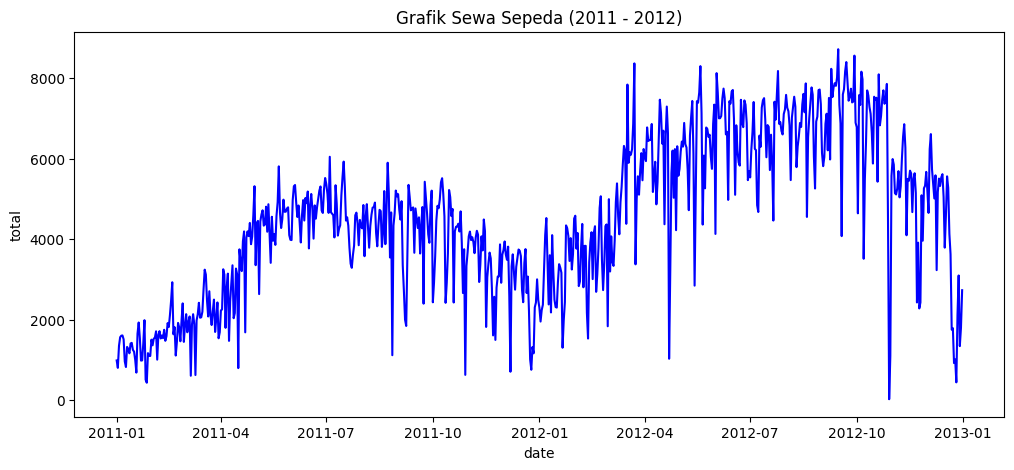

In [35]:
def grafik_sewa():
  plt.figure(figsize=(12, 5))
  plt.plot(bike_day['date'], bike_day['total'], color='blue')
  plt.title("Grafik Sewa Sepeda (2011 - 2012)")
  plt.xlabel('date')
  plt.ylabel('total')
  plt.show()

grafik_sewa()

### Visualisasi Perbandingan antara jumlah penyewa biasa dan penyewa yang telah terdaftar

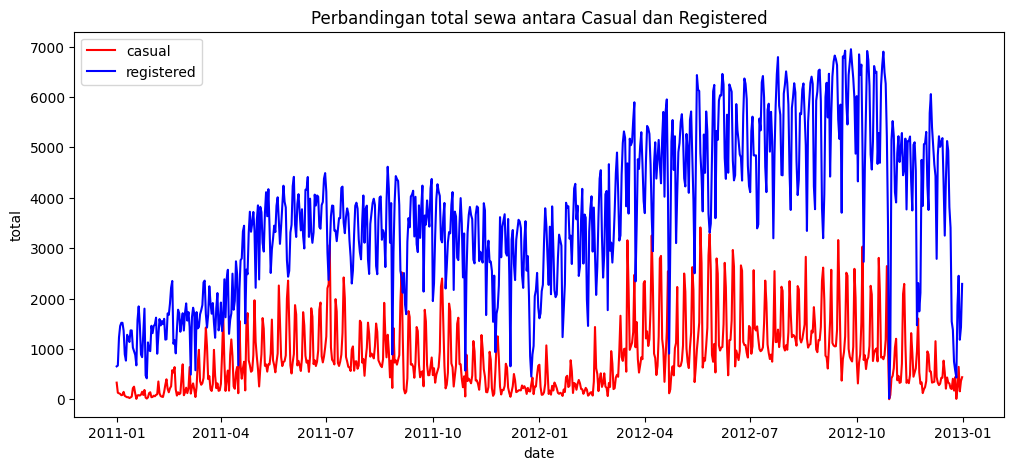

In [36]:
def casual_registered():
  plt.figure(figsize=(12, 5))
  plt.plot(bike_day['date'], bike_day['casual'], label='casual', color='red')
  plt.plot(bike_day['date'], bike_day['registered'], label='registered', color='blue')
  plt.title('Perbandingan total sewa antara Casual dan Registered')
  plt.xlabel('date')
  plt.ylabel('total')
  plt.legend()
  plt.show()

casual_registered()

### Visualisasi perbandingan jumlah sewa berdasarkan bulan

<Axes: title={'center': 'Perbandingan sewa antar bulan'}, xlabel='bulan', ylabel='total_sewa'>

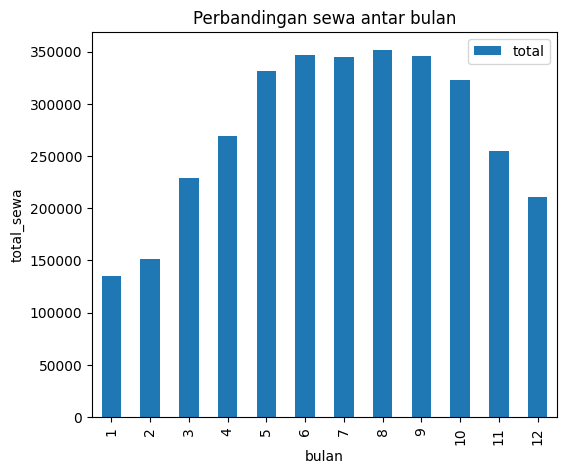

In [39]:
monthly_rent = bike_day.groupby(by='month').agg({
    'total': 'sum',
})
monthly_rent.plot(kind='bar', title='Perbandingan sewa antar bulan', 
                  ylabel='total_sewa',
                  xlabel='bulan',
                  figsize=(6, 5))

### Visualisasi perbandingan jumlah sewa berdasarkan musim

<Axes: title={'center': 'Perbandingan sewa setiap musim'}, xlabel='season', ylabel='total_rent'>

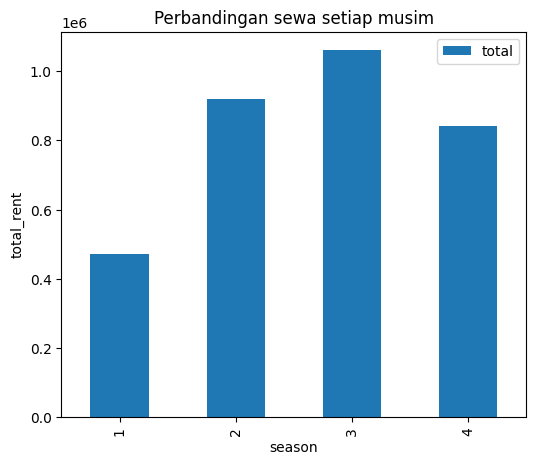

In [41]:
season_rent = bike_day.groupby(by='season').agg({
    'total': 'sum',
})
season_rent.plot(kind='bar', title='Perbandingan sewa setiap musim', 
                  ylabel='total_rent',
                  xlabel='season', 
                  figsize=(6, 5))

### Visualisasi perbandingan jumlah sewa berdasarkan hari

<Axes: title={'center': 'Perbandingan sewa berdasarkan hari'}, xlabel='weekday', ylabel='total_rent'>

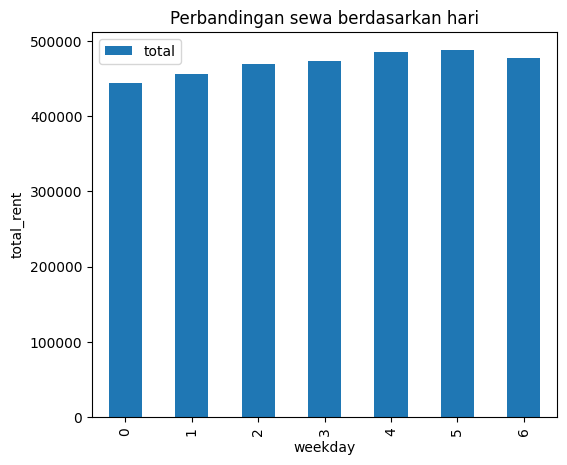

In [42]:
season_rent = bike_day.groupby(by='weekday').agg({
    'total': 'sum',
})
season_rent.plot(kind='bar', title='Perbandingan sewa berdasarkan hari', 
                  ylabel='total_rent',
                  xlabel='weekday', 
                  figsize=(6, 5))

### Perbandingan jumlah sewa per tahun berdasarkan hari libur atau tidak.
* 0 : Bukan hari liburan
* 1 : Hari liburan

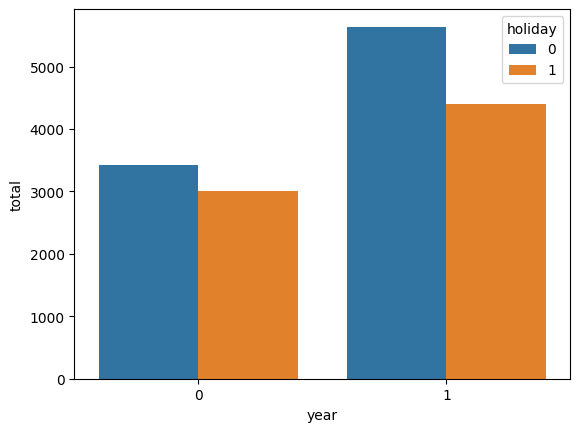

In [43]:
sns.barplot(data=bike_day, x="year", y="total", hue="holiday", errorbar=None)
plt.show()

### Distribusi Scatterplot total sewa berdasarkan temp dan atemp

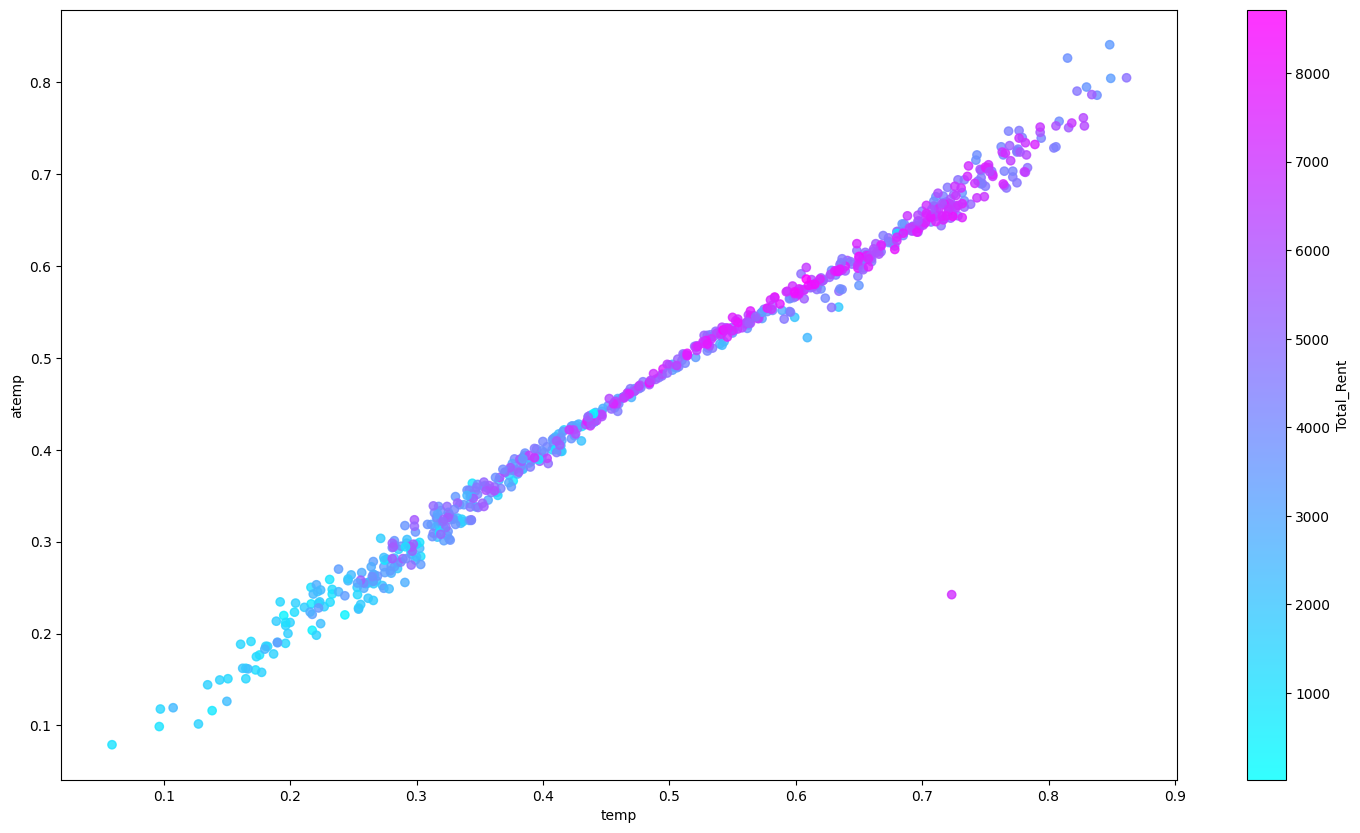

In [44]:
plt.figure(figsize=(18,10))
plt.scatter(bike_day['temp'],bike_day['atemp'],c=bike_day['total'], cmap='cool', alpha = 0.8)
plt.colorbar().set_label("Total_Rent")
plt.xlabel('temp')
plt.ylabel('atemp')
plt.show()

### Korelasi antara fitur numerik pada Data Bike Day

Text(0.5, 1.0, 'Correlation matrix untuk fitur numerik pada Bike Day ')

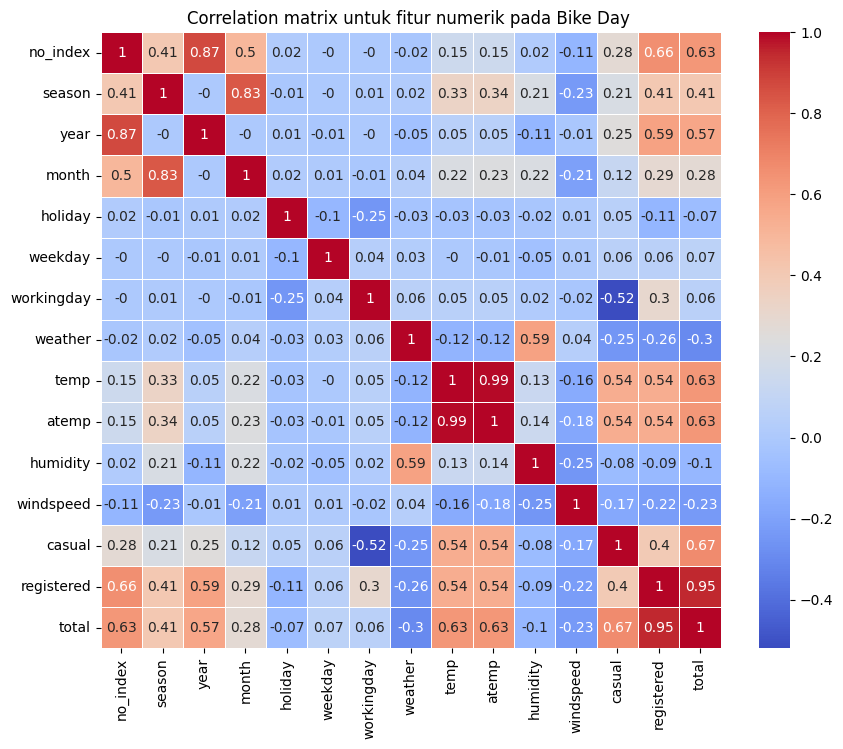

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = bike_day.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation matrix untuk fitur numerik pada Bike Day ")

### Perbandingan jumlah sewa berdasarkan jam

<Axes: title={'center': 'Perbandingan jumlah sewa berdasarkan jam'}, xlabel='hour', ylabel='total_rent'>

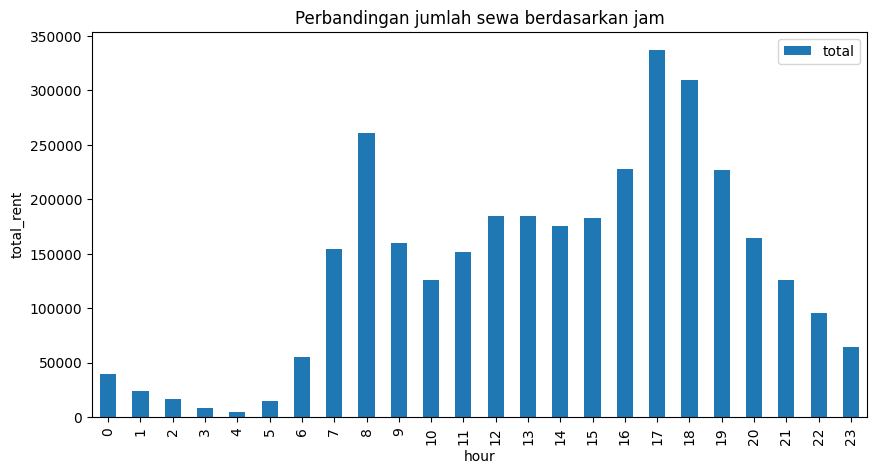

In [47]:
hour_rent = bike_hour.groupby(by='hour').agg({
    'total': 'sum',
})
hour_rent.plot(kind='bar', title='Perbandingan jumlah sewa berdasarkan jam', 
                  ylabel='total_rent',
                  xlabel='hour', 
                  figsize=(10, 5))

In [48]:
bike_day.to_csv("clean_bike_day.csv", index=False)

In [49]:
bike_hour.to_csv("clean_bike_hour.csv", index=False)